# **Scikit-learn** basics

Md Shad Akhtar, LCS2@IIIT-Delhi

Scikit-learn demonstration for FDP on Python Programming.

Requirements: 
1. sklearn
2. numpy 
3. nltk


In [1]:
# Import some useful libraries
import numpy as np
# import pandas as pd

Load Dataset

In [2]:
from sklearn.datasets import load_iris

#import IRIS dataset
iris = load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [45]:
x = iris.data
y = iris.target
features = iris.feature_names
target = iris.target_names

print("Feature Names:",features)
print("-"*100)
print("Target Names:", target)
print("-"*100)
print("data:", x[:10])
print("-"*100)

Feature Names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
----------------------------------------------------------------------------------------------------
Target Names: ['setosa' 'versicolor' 'virginica']
----------------------------------------------------------------------------------------------------
data: [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]
----------------------------------------------------------------------------------------------------


In [46]:
print (type(x))

<class 'numpy.ndarray'>


In [47]:
# checking shape of dataset before spliting
print(x.shape)
print(y.shape)

(150, 4)
(150,)


Split data into train and test set. 

In [48]:
from sklearn.model_selection import train_test_split

# spliting data in test and train set keeping 70% data in train set and 30% data in test set. 
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 1)

# checking shape of dataset "after" spliting
print("Train Data Details")
print(X_train.shape)
print(X_test.shape)

print("-"*50)

print("Test Data Details")
print(y_train.shape)
print(y_test.shape)

Train Data Details
(112, 4)
(38, 4)
--------------------------------------------------
Test Data Details
(112,)
(38,)


# **Building a model**
Decision Tree

In [49]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

Train on train set

In [50]:
# DT Classifier
dt = DecisionTreeClassifier()

# Lets fit the data into classifier 
dt.fit(X_train, y_train)

DecisionTreeClassifier()

Prediction on test set

In [51]:
# predict on test data
y_pred = dt.predict(X_test)

In [52]:
print (y_pred)

[0 1 1 0 2 1 2 0 0 2 1 0 2 1 1 0 1 1 0 0 1 1 2 0 2 1 0 0 1 2 1 2 1 2 2 0 1
 0]


In [53]:
print(y_test)

[0 1 1 0 2 1 2 0 0 2 1 0 2 1 1 0 1 1 0 0 1 1 1 0 2 1 0 0 1 2 1 2 1 2 2 0 1
 0]


Evaluation: Measure the performance of the trained model. 

In [54]:
import seaborn as sns
def evaluate(y_true, y_pred, mode='macro'):
  print('Accuracy:',accuracy_score(y_true, y_pred))
  print("Precision-Recall-F1 Score", precision_recall_fscore_support(y_true, y_pred, average=mode)[:3])
  #confusion matrix
  cm = metrics.confusion_matrix(y_true, y_pred)
  print('----'*10)
  print(cm)
  print('----'*10)
  ##Annotation
  sns.heatmap(cm, annot=True)


Accuracy: 0.9736842105263158
Precision-Recall-F1 Score (0.9666666666666667, 0.9791666666666666, 0.9717034521788342)
----------------------------------------
[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]
----------------------------------------


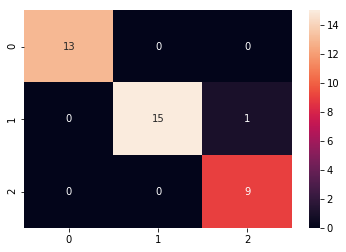

In [55]:
evaluate(y_test, y_pred)

Support Vector Machine: Linear SVM

In [56]:
from sklearn.svm import LinearSVC

#Linear SVC Classifier
clf = LinearSVC(penalty='l2', loss='squared_hinge', C=100)

# Fitting training data into classifier
clf.fit(X_train,y_train)

# Accuracy
print('Training accuracy: {:.2f}'.format(clf.score(X_train, y_train) * 100))

Training accuracy: 96.43


E:\anaconda\envs\cs231n\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Test
Accuracy: 0.868421052631579
Precision-Recall-F1 Score (0.8736263736263736, 0.8958333333333334, 0.8653198653198654)
----------------------------------------
[[13  0  0]
 [ 1 11  4]
 [ 0  0  9]]
----------------------------------------


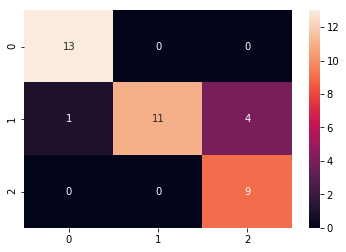

In [57]:
y_pred = clf.predict(X_test)
print('Test')
evaluate(y_test, y_pred)

Support Vector Machine: Kernel SVM

Accuracy of SVC on training set: 98.21
Test
Accuracy: 0.9736842105263158
Precision-Recall-F1 Score (0.9666666666666667, 0.9791666666666666, 0.9717034521788342)
----------------------------------------
[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]
----------------------------------------


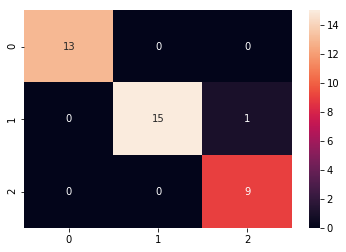

In [59]:
from sklearn.svm import SVC

# SVC Classifier
clf_SVC = SVC(C=100.0, kernel='rbf', degree=3, gamma='auto', coef0=0.0, shrinking=True, 
          probability=False, tol=0.001, cache_size=200, class_weight=None, 
          verbose=0, max_iter=-1, decision_function_shape="ovr", random_state = 0)

# Fitting training data
clf_SVC.fit(X_train,y_train)

# predicting accuracies
print('Accuracy of SVC on training set: {:.2f}'.format(clf_SVC.score(X_train, y_train) * 100))

# predictions
y_pred = clf_SVC.predict(X_test)
print('Test')
evaluate(y_test, y_pred)

Neural Netwroks: Multi-layer Perceptron (MLP)

In [60]:
from sklearn.neural_network import MLPClassifier # neural network

# Classifier
clf = MLPClassifier(alpha=1e-5, hidden_layer_sizes=(3, 3), random_state=1, verbose=True, max_iter=20)
print(clf.get_params())



{'activation': 'relu', 'alpha': 1e-05, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 3), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 20, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 1, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': True, 'warm_start': False}


In [61]:
#Fiting trainging data
clf.fit(X_train, y_train)

Iteration 1, loss = 1.16374727
Iteration 2, loss = 1.15851323
Iteration 3, loss = 1.15304095
Iteration 4, loss = 1.14749201
Iteration 5, loss = 1.14198799
Iteration 6, loss = 1.13633537
Iteration 7, loss = 1.13055165
Iteration 8, loss = 1.12466765
Iteration 9, loss = 1.11903797
Iteration 10, loss = 1.11342383
Iteration 11, loss = 1.10770560
Iteration 12, loss = 1.10229156
Iteration 13, loss = 1.09693001
Iteration 14, loss = 1.09176170
Iteration 15, loss = 1.08671844
Iteration 16, loss = 1.08199581
Iteration 17, loss = 1.07788282
Iteration 18, loss = 1.07379261
Iteration 19, loss = 1.06977464
Iteration 20, loss = 1.06591248


E:\anaconda\envs\cs231n\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(alpha=1e-05, hidden_layer_sizes=(3, 3), max_iter=20,
              random_state=1, verbose=True)

In [62]:
print([coef.shape for coef in clf.coefs_])
[coef for coef in clf.coefs_]


[(4, 3), (3, 3), (3, 3)]


[array([[-0.15132608,  0.42789127, -0.91696817],
        [-0.36129583, -0.63393058, -0.74715573],
        [-0.57441015, -0.2667428 , -0.18834977],
        [ 0.07071162, -0.13111437,  0.33847244]]),
 array([[ 0.33646776, -0.16291753,  0.11555355],
        [-0.73999428, -0.6245509 ,  0.5948165 ],
        [ 0.92782729, -0.36837   ,  0.37975471]]),
 array([[-0.90266807, -0.68067819,  0.73993695],
        [-0.7839816 , -0.17812344,  0.89878987],
        [ 0.06525199,  0.37887209, -0.36422714]])]

Test
Accuracy: 0.34210526315789475
Precision-Recall-F1 Score (0.22875816993464052, 0.38425925925925924, 0.2767676767676767)
----------------------------------------
[[ 0  9  4]
 [ 0  6 10]
 [ 0  2  7]]
----------------------------------------


E:\anaconda\envs\cs231n\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


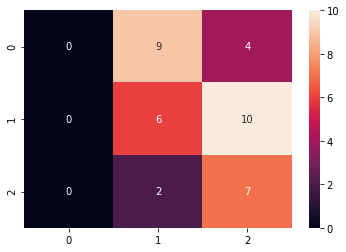

In [63]:
#predicting the data
y_pred = clf.predict(X_test)
print('Test')
evaluate(y_test, y_pred)

Example 2: NLP

Dataset: 20_News_Group 

In [64]:
from sklearn.datasets import fetch_20newsgroups
# newsgroups_train = fetch_20newsgroups()
newsgroups_train = fetch_20newsgroups(subset='train', remove=('headers', 'footers', 'quotes'))

# print(newsgroups_train.DESCR)

In [65]:
print(newsgroups_train.DESCR)

.. _20newsgroups_dataset:

The 20 newsgroups text dataset
------------------------------

The 20 newsgroups dataset comprises around 18000 newsgroups posts on
20 topics split in two subsets: one for training (or development)
and the other one for testing (or for performance evaluation). The split
between the train and test set is based upon a messages posted before
and after a specific date.

This module contains two loaders. The first one,
:func:`sklearn.datasets.fetch_20newsgroups`,
returns a list of the raw texts that can be fed to text feature
extractors such as :class:`sklearn.feature_extraction.text.CountVectorizer`
with custom parameters so as to extract feature vectors.
The second one, :func:`sklearn.datasets.fetch_20newsgroups_vectorized`,
returns ready-to-use features, i.e., it is not necessary to use a feature
extractor.

**Data Set Characteristics:**

    =================   ==========
    Classes                     20
    Samples total            18846
    Dimensionality 

In [66]:
print(newsgroups_train.data[1])
print(newsgroups_train.target[1])

A fair number of brave souls who upgraded their SI clock oscillator have
shared their experiences for this poll. Please send a brief message detailing
your experiences with the procedure. Top speed attained, CPU rated speed,
add on cards and adapters, heat sinks, hour of usage per day, floppy disk
functionality with 800 and 1.4 m floppies are especially requested.

I will be summarizing in the next two days, so please add to the network
knowledge base if you have done the clock upgrade and haven't answered this
poll. Thanks.
4


In [67]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
print("STOPWORDS \n",stopwords.words('english'))

STOPWORDS 
 ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Himanshu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [68]:
import re
from tqdm import tqdm

In [69]:
preprocessed = []
# tqdm is for printing the status bar
for sentance in tqdm(newsgroups_train.data[:20]):
    sentance = re.sub(r"http\S+", "", sentance)
    sentance = ' '.join(e.lower() for e in sentance.split() if e.lower() not in stopwords.words('english'))
    preprocessed.append(sentance.strip())

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:02<00:00,  9.78it/s]


In [70]:
print(preprocessed[1])

fair number brave souls upgraded si clock oscillator shared experiences poll. please send brief message detailing experiences procedure. top speed attained, cpu rated speed, add cards adapters, heat sinks, hour usage per day, floppy disk functionality 800 1.4 floppies especially requested. summarizing next two days, please add network knowledge base done clock upgrade answered poll. thanks.


# BOW

In [71]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer() #in scikit-learn
count_vect.fit(preprocessed)
final_counts = count_vect.transform(preprocessed)


In [72]:
print("some feature names ", count_vect.get_feature_names())
print('='*50)

print("the type of count vectorizer ",type(final_counts))
print("the shape of out text BOW vectorizer ",final_counts.get_shape())
print("the number of unique words ", final_counts.get_shape()[1])

some feature names  ['000', '0320', '0826', '10', '100', '1000', '1000yds', '100k', '10mb', '11', '1100', '1150', '12', '120', '1200', '1200x', '12mb', '1300', '14', '1400', '15', '150', '1500', '1560', '16', '160', '161', '173', '17k', '18', '180', '185c', '1978', '1985', '1986', '1987', '1990', '1992', '1st', '20', '2000', '2028', '20mb', '21', '213', '23', '24', '25', '250', '26', '27', '28', '287', '2k', '2nd', '2x', '30', '300', '300hp', '300k', '32', '3495', '35', '36', '37', '38', '39', '3b2', '3k', '3rd', '40mb', '41', '415', '43', '44', '45', '460', '50', '500', '51', '512k', '520', '525ft', '55', '5mb', '5x', '60', '600', '60s', '61', '64', '6547', '6mb', '70s', '7x35', '80', '800', '80mb', '820', '85', '89', '900gts', '92', '924', '926', '93', '944', '96', '962', '_rv', 'aardvark', 'able', 'about', 'abraham', 'abs', 'absolute', 'abuse', 'accel', 'acceleration', 'access', 'accessories', 'accident', 'accidentally', 'accidents', 'account', 'accuracy', 'achieved', 'acquisition',

# Tf-Idf: tf * log (N/df)


In [73]:
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer

tf_idf_vect = TfidfVectorizer(ngram_range=(1,2), min_df=0.1)
tf_idf_vect.fit(preprocessed)
final_tf_idf = tf_idf_vect.transform(preprocessed)

In [74]:
print("some sample features(unique words in the corpus)",tf_idf_vect.get_feature_names())
print('='*50)

print("the type of count vectorizer ",type(final_tf_idf))
print("the shape of out text TFIDF vectorizer ",final_tf_idf.get_shape())
print("the number of unique words including both unigrams and bigrams ", final_tf_idf.get_shape()[1])

some sample features(unique words in the corpus) ['10', '100', '1000', '120', '14', '15', '1985', '20', '23', '24', '25', '2nd', '30', '32', '60', '80', '800', 'able', 'absolute', 'access', 'actually', 'add', 'add another', 'addition', 'also', 'although', 'always', 'am', 'and', 'another', 'anymore', 'anyone', 'apple', 'appreciated', 'around', 'article', 'as', 'aside', 'ask', 'available', 'back', 'base', 'based', 'before', 'better', 'bit', 'board', 'but', 'buy', 'call', 'can', 'car', 'car made', 'case', 'change', 'chip', 'city', 'clock', 'code', 'com', 'come', 'comes', 'computer', 'consider', 'considered', 'control', 'correct', 'cost', 'could', 'course', 'crew', 'currently', 'data', 'day', 'deal', 'defined', 'different', 'disk', 'dropped', 'duo', 'ecn', 'edu', 'either', 'email', 'everyone', 'expected', 'fair', 'faster', 'fault', 'features', 'feel', 'file', 'fix', 'folks', 'for', 'front', 'get', 'gets', 'gets older', 'go', 'goes', 'good', 'got', 'great', 'hand', 'handle', 'hard', 'heard'

In [32]:
from sklearn.svm import SVC

# Pipeline models

In [75]:
from sklearn.pipeline import Pipeline
text_clf = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf-svm', SVC(max_iter=10, random_state=1))])
text_clf = text_clf.fit(newsgroups_train.data, newsgroups_train.target)

E:\anaconda\envs\cs231n\lib\site-packages\sklearn\svm\_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


In [76]:
twenty_test = fetch_20newsgroups(subset='test', shuffle=True)


In [78]:
predicted = text_clf.predict(twenty_test.data[:10])

Accuracy: 0.2
Precision-Recall-F1 Score (0.1388888888888889, 0.1875, 0.10833333333333332)
----------------------------------------
[[1 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0]
 [1 0 1 0 0 0 0 0]
 [1 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0]
 [2 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0]]
----------------------------------------


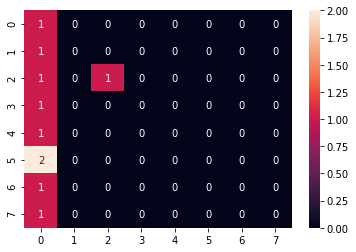

In [79]:
evaluate(twenty_test.target[:10],predicted)

# Grid Search

In [80]:
from sklearn.model_selection import GridSearchCV
# parameters = {'vect__ngram_range': [(1, 1), (1, 2)],
#               'tfidf__use_idf': (True, False),
#               'clf-svm__C': (1.0, 1.1, 1.5),
#               }
parameters = {'vect__ngram_range': [(1, 1)],
              'clf-svm__C': (1.0, 1.1),
              }

In [81]:
gs_clf = GridSearchCV(text_clf, parameters, n_jobs=-1)
gs_clf = gs_clf.fit(newsgroups_train.data[:100], newsgroups_train.target[:100])

E:\anaconda\envs\cs231n\lib\site-packages\sklearn\model_selection\_split.py:672: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
E:\anaconda\envs\cs231n\lib\site-packages\sklearn\svm\_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


In [82]:
print(gs_clf.best_score_)
print(gs_clf.best_params_)
print(gs_clf.cv_results_)

0.09
{'clf-svm__C': 1.0, 'vect__ngram_range': (1, 1)}
{'mean_fit_time': array([0.08637609, 0.07757711]), 'std_fit_time': array([0.00636773, 0.00641096]), 'mean_score_time': array([0.01260195, 0.01289992]), 'std_score_time': array([0.00206337, 0.00242331]), 'param_clf-svm__C': masked_array(data=[1.0, 1.1],
             mask=[False, False],
       fill_value='?',
            dtype=object), 'param_vect__ngram_range': masked_array(data=[(1, 1), (1, 1)],
             mask=[False, False],
       fill_value='?',
            dtype=object), 'params': [{'clf-svm__C': 1.0, 'vect__ngram_range': (1, 1)}, {'clf-svm__C': 1.1, 'vect__ngram_range': (1, 1)}], 'split0_test_score': array([0.1, 0.1]), 'split1_test_score': array([0.1, 0.1]), 'split2_test_score': array([0.1, 0.1]), 'split3_test_score': array([0.1, 0.1]), 'split4_test_score': array([0.05, 0.05]), 'mean_test_score': array([0.09, 0.09]), 'std_test_score': array([0.02, 0.02]), 'rank_test_score': array([1, 1])}


In [83]:
from sklearn.metrics import precision_recall_fscore_support
import numpy as np

a = np.zeros(10)
b = np.ones(10)
c = np.append(a,b)
np.random.shuffle(c)

a = np.zeros(18)
b = np.ones(2)
d = np.append(b,a)
np.random.shuffle(d)

print (a)
print (d)
print (c)

print(precision_recall_fscore_support(c, d, average='weighted'))
print(precision_recall_fscore_support(c, d, average='macro'))
print(precision_recall_fscore_support(c, d, average='micro'))

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 1. 0. 1. 0. 0. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 0. 1.]
(0.7777777777777778, 0.6, 0.523809523809524, None)
(0.7777777777777778, 0.6, 0.5238095238095238, None)
(0.6, 0.6, 0.6, None)


In [42]:
def isNotNull(value):
    return value is not None and len(value)>0

dict_pos = []
dict_neg = []
f = open('negative-words.txt','r')
for line in f:
    t= line.strip().lower();
    if (isNotNull(t)):
        dict_neg.append(t)
f.close()

f = open('positive-words.txt','r')
for line in f:
    t = line.strip().lower();
    if (isNotNull(t)):
        dict_pos.append(t)
f.close()